In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df=pd.read_csv('train.csv')

In [70]:
df.drop('Ticket',inplace=True,axis=1)



In [71]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


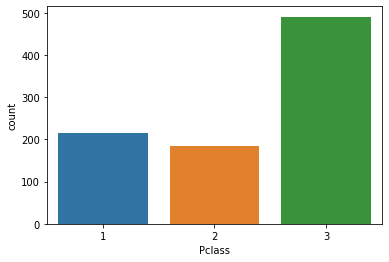

In [20]:
sns.countplot(x='Pclass',data=df)

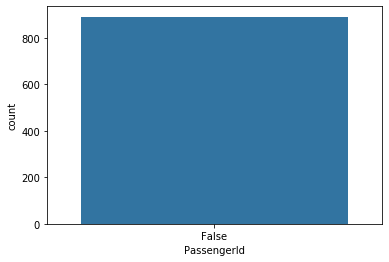

In [18]:
sns.countplot(x='PassengerId',data=df.isnull())

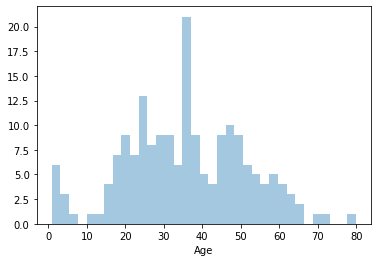

In [26]:
sns.distplot(df.dropna()['Age'],bins=35,kde=False)

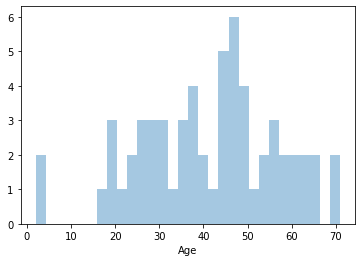

In [33]:
sns.distplot(df[df['Survived']==0].dropna()['Age'],kde=False,bins=30)

In [36]:
# sns.scatterplot(x='Age',y='Pclass',data=df.head(10))

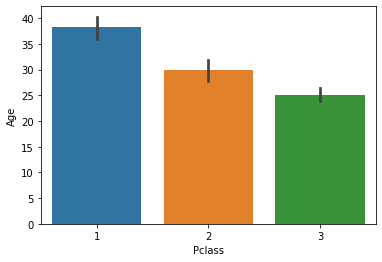

In [37]:
sns.barplot(x="Pclass",y='Age',data=df)

In [38]:
#avg age-> 1 class=37,second class=29 ,third class=24

In [81]:
def age_fill(x):
    age=x[0]
    pclass=x[1]
    print(type(x))
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age
    

In [82]:
df["Age"]=df[["Age",'Pclass']].apply(age_fill,axis=1)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

In [83]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [84]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,24.0,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [87]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [91]:
df=pd.concat([df,sex],axis=1)

In [94]:
df.drop(['Sex',"Embarked",'Cabin'],axis=1,inplace=True)

In [95]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1
887,888,1,1,19.0,0,0,30.0000,0
888,889,0,3,24.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


In [96]:
df.dropna(inplace=True)

In [97]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1
887,888,1,1,19.0,0,0,30.0000,0
888,889,0,3,24.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


In [98]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1
887,888,1,1,19.0,0,0,30.0000,0
888,889,0,3,24.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


In [99]:
df.drop('PassengerId',axis=1,inplace=True)

In [100]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,24.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [101]:
X=df.drop('Survived',axis=1)

In [102]:
y=df["Survived"]

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lg=LogisticRegression()

In [107]:
lg.fit(X_train,y_train)

C:\Users\Daksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
predictions=lg.predict(X_test)

In [110]:
from sklearn.metrics import classification_report


In [111]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.85       161\n           1       0.82      0.70      0.75       107\n\n    accuracy                           0.82       268\n   macro avg       0.82      0.80      0.80       268\nweighted avg       0.82      0.82      0.81       268\n'

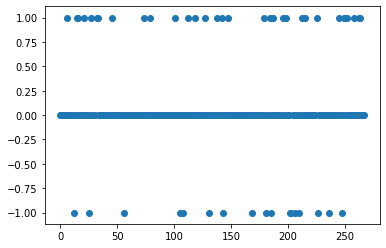

In [119]:
# type(sex)|